In [ ]:
import pandas as pd
from prophet import Prophet
import datetime
from datetime import datetime

DATA EXPLORATION

In [ ]:
df = pd.read_csv('/content/Weekly oil prices.csv')
df.head()

,Unnamed: 0,value,date
0,0,107.610,03-11-2013
1,1,104.538,10-11-2013
2,2,107.098,17-11-2013
3,3,109.324,24-11-2013
4,4,111.315,01-12-2013


In [ ]:
df=df[["date","value"]]
df.head()

,date,value
0,03-11-2013,107.610
1,10-11-2013,104.538
2,17-11-2013,107.098
3,24-11-2013,109.324
4,01-12-2013,111.315


In [ ]:
print(df.columns)

Index(['date', 'value'], dtype='object')


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-8-df3eb660f625>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
517,2023-01-10,95.614
518,2023-08-10,90.328
519,2023-10-15,90.476
520,2023-10-22,92.468
521,2023-10-29,91.880


<Axes: xlabel='ds'>

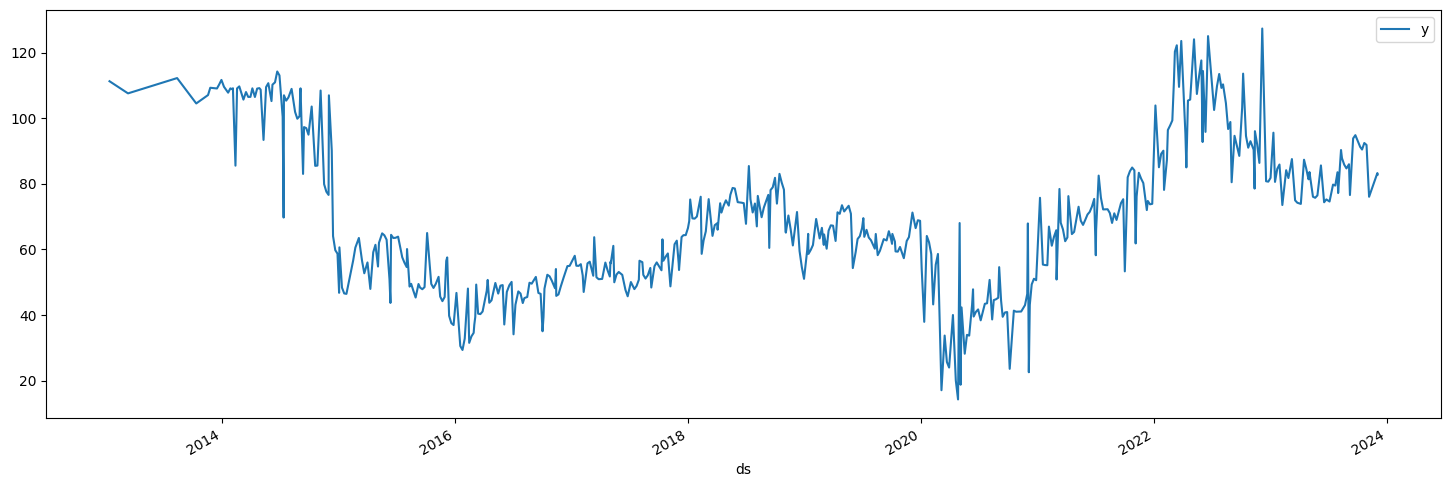

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train_data = df[(df['ds'] >= '2013-01-01') & (df['ds'] <= '2022-12-31')]
train_data

,ds,y
0,2013-11-03,107.610
1,2013-11-10,104.538
2,2013-11-17,107.098
3,2013-11-24,109.324
4,2013-12-01,111.315
...,...,...
473,2022-11-27,86.396
474,2022-12-04,85.030
475,2022-12-11,78.556
476,2022-12-18,80.802


USING FBPROPHET  

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/oyh5hilf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/7dmsajo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17765', 'data', 'file=/tmp/tmpkmc8gvz9/oyh5hilf.json', 'init=/tmp/tmpkmc8gvz9/7dmsajo_.json', 'output', 'file=/tmp/tmpkmc8gvz9/prophet_modelwaz2imiu/prophet_model-20231105103503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:35:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:35:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=52, freq='W')
future.tail()
forecast = m.predict(future)

In [ ]:

forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
525,2023-11-26,135.328199,117.379383,144.808540,128.955050,140.730193,-3.627628,-3.627628,-3.627628,-3.627628,-3.627628,-3.627628,0.0,0.0,0.0,131.700571
526,2023-12-03,135.845403,117.426830,145.030256,129.300887,141.507539,-4.670464,-4.670464,-4.670464,-4.670464,-4.670464,-4.670464,0.0,0.0,0.0,131.174939
527,2023-12-10,136.362608,116.326882,143.826875,129.543067,142.236661,-5.736018,-5.736018,-5.736018,-5.736018,-5.736018,-5.736018,0.0,0.0,0.0,130.626590
528,2023-12-17,136.879813,116.414795,144.660722,129.913504,143.027695,-6.124784,-6.124784,-6.124784,-6.124784,-6.124784,-6.124784,0.0,0.0,0.0,130.755029
529,2023-12-24,137.397017,115.820697,145.240236,130.212051,143.757489,-5.602859,-5.602859,-5.602859,-5.602859,-5.602859,-5.602859,0.0,0.0,0.0,131.794159


In [ ]:
len(forecast)

NameError: ignored

In [ ]:
len(future)

530

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
525,2023-11-26,131.700571,117.379383,144.808540
526,2023-12-03,131.174939,117.426830,145.030256
527,2023-12-10,130.626590,116.326882,143.826875
528,2023-12-17,130.755029,116.414795,144.660722
529,2023-12-24,131.794159,115.820697,145.240236


PLOTTING

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
test_data = df[(df['ds'] >= '2023-01-01') & (df['ds'] <= '2024-12-31')]
test_data

,ds,y
2338,2023-03-01,80.36
2339,2023-04-01,75.31
2340,2023-05-01,76.73
2341,2023-06-01,76.41
2342,2023-09-01,77.50
...,...,...
2558,2023-09-11,NaN
2559,2023-10-11,NaN
2560,2023-11-11,NaN
2561,2023-12-11,NaN


In [ ]:
len(test_data)

225

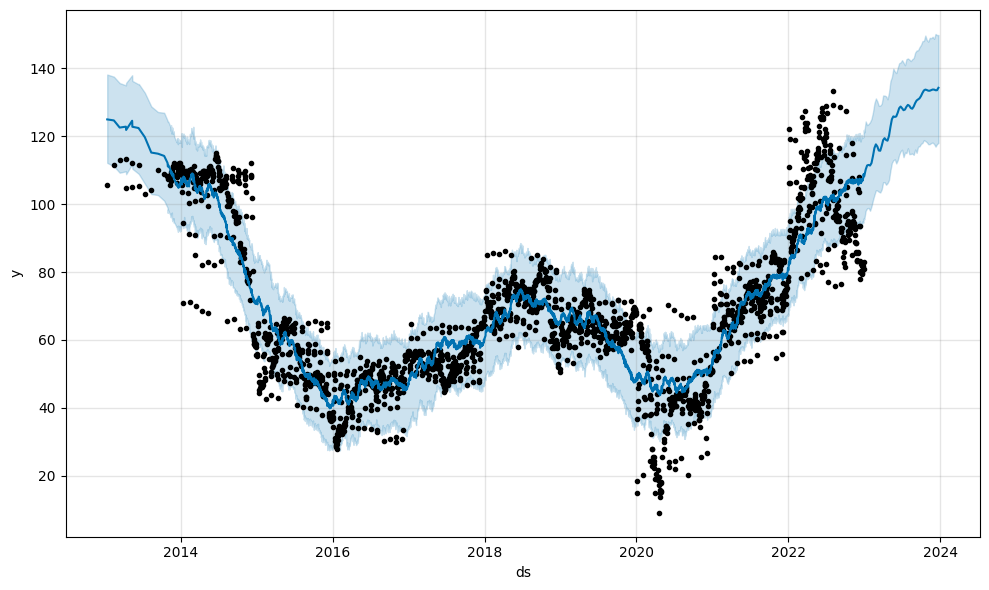

In [ ]:
fig = m.plot(forecast)

Text(0.5, 1.0, 'Fitted Values and Test Values for 2023')

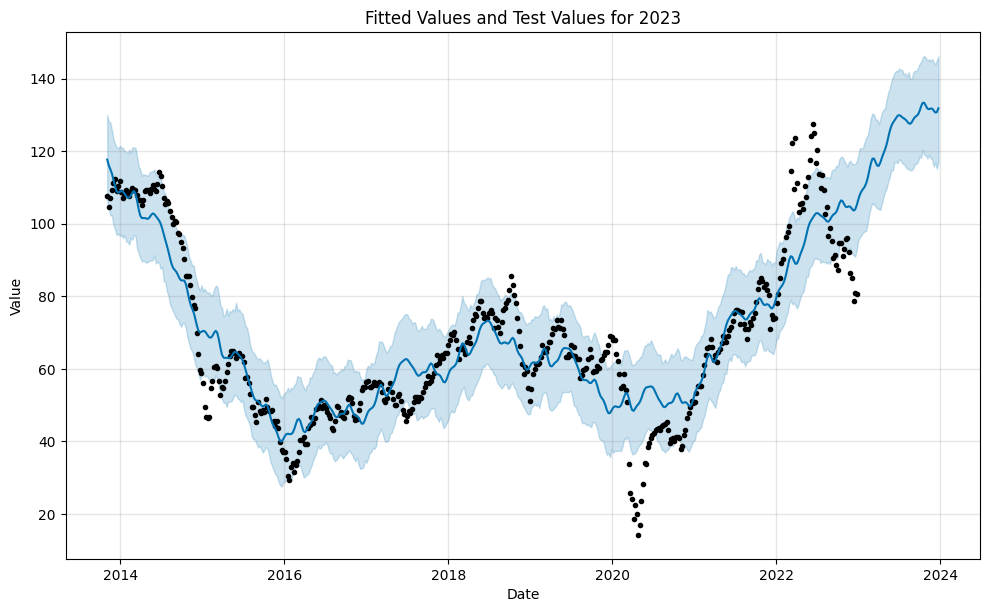

In [ ]:
fig = m.plot(forecast, xlabel='Date', ylabel='Value')
import matplotlib.pyplot as plt
plt.title('Fitted Values and Test Values for 2023')

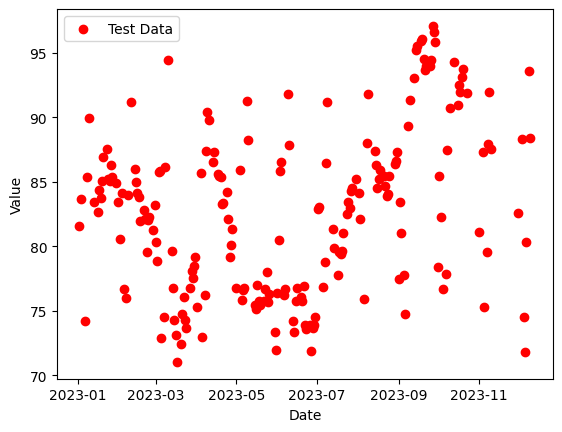

In [ ]:
plt.scatter(test_data['ds'], test_data['y'], color='red', label='Test Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

In [ ]:
plt.show()

In [ ]:
df = df.sort_values(by='ds')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Fitted Values'))
fig.add_trace(go.Scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Test Values', marker=dict(color='red')))
fig.add_trace(go.Scatter(x=train_data['ds'], y=train_data['y'], mode='lines', name='Training Data', line=dict(color='green')))
fig.update_layout(title='Test vs. Fitted Values for 2023',
                  xaxis_title='Date',
                  yaxis_title='Value')

MEAN SQUARE ERROR CHECK

In [ ]:

from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:

print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  18.722988835333588
Mean Value of Test Dataset: 68.67667305936074


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
df_crossval = cross_validation(m, initial='730 days', period='365 days', horizon='365 days')
df_mtrcs = performance_metrics(df_crossval)
df_crossval.head()
df_mtrcs.head()

INFO:prophet:Making 7 forecasts with cutoffs between 2015-12-27 00:00:00 and 2021-12-25 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/tp33376n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/qwhr0_zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27266', 'data', 'file=/tmp/tmpkmc8gvz9/tp33376n.json', 'init=/tmp/tmpkmc8gvz9/qwhr0_zr.json', 'output', 'file=/tmp/tmpkmc8gvz9/prophet_model6llb37ku/prophet_model-20231105100250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/ncwp12xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkmc8gvz9/byi3vo_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,217.450578,14.746206,13.178512,0.217341,0.199609,0.243304,0.250000
1,37 days,235.190094,15.335909,13.815279,0.229196,0.207700,0.258964,0.222222
2,38 days,227.108074,15.070105,13.416176,0.221090,0.199609,0.248933,0.250000
3,39 days,226.181926,15.039346,13.375956,0.221027,0.199609,0.247992,0.250000
4,40 days,221.940286,14.897660,13.259319,0.216556,0.199609,0.246233,0.250000
